# Filled Benchmark Figure on OpenML-CC18

## Setup

In [1]:
import ast
import numpy as np
import pandas as pd
import openml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Define color palette
sns.set(
    color_codes=True, palette="bright", style="white", context="talk", font_scale=1.5
)

In [3]:
def plot_acc(col, ls, pos, n_train):
    if pos == 0:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, label=legends[i], c=colors[i], alpha=0.3)
    else:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, c=colors[i], alpha=0.3)


def plot_fill(col, rf_ls, sdf_ls, label, n_train):
    if label:
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls <= rf_ls,
            color=colors[0],
            interpolate=True,
            alpha=0.3,
            label=legends[0],
        )
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls >= rf_ls,
            color=colors[1],
            interpolate=True,
            alpha=0.3,
            label=legends[1],
        )
    else:
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls <= rf_ls,
            color=colors[0],
            interpolate=True,
            alpha=0.3,
        )
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls >= rf_ls,
            color=colors[1],
            interpolate=True,
            alpha=0.3,
        )

    return False


def plot_eff(col, ls, pos, n_train):
    if pos == 0:
        col.scatter(n_train, ls[pos], label=legends[1], c=colors[1], alpha=0.3, s=5)
    else:
        col.scatter(n_train, ls[pos], c=colors[1], alpha=0.3, s=5)

In [4]:
sns.set_theme(style="white", palette="bright", context="talk", font_scale=1.5)
BATCH_SIZE = 100
directory = "../benchmarks/results/"
prefixes = ["rf/", "sdf/"]
legends = [
    "RF wins",
    "SDF wins",
]
colors = ["b", "r"]
datasets = openml.study.get_suite("OpenML-CC18").data

In [5]:
ranges = []
rf_acc_dict = json.load(open(directory + "rf/cc18_acc.json"))
sdf_acc_dict = json.load(open(directory + "sdf/cc18_acc.json"))
avg_rf_acc_ls = []
avg_sdf_acc_ls = []

for dataset in datasets:
    ranges.append(len(rf_acc_dict[str(dataset)][0]))

    avg_rf_acc_l = np.mean(rf_acc_dict[str(dataset)], axis=0)
    avg_rf_acc_ls.append(avg_rf_acc_l)

    avg_sdf_acc_l = np.mean(sdf_acc_dict[str(dataset)], axis=0)
    avg_sdf_acc_ls.append(avg_sdf_acc_l)

avg_rf_acc_ls = np.array(avg_rf_acc_ls, dtype=object)
avg_sdf_acc_ls = np.array(avg_sdf_acc_ls, dtype=object)

## Plot accuracy comparison

In [6]:
ratio_ls = 100 * (avg_sdf_acc_ls - avg_rf_acc_ls) / avg_rf_acc_ls

eff_filter = []
for i in range(len(ratio_ls)):
    if np.amax(ratio_ls[i]) >= 1 and np.amin(ratio_ls[i]) <= -1:
        eff_filter.append(False)
    else:
        eff_filter.append(True)

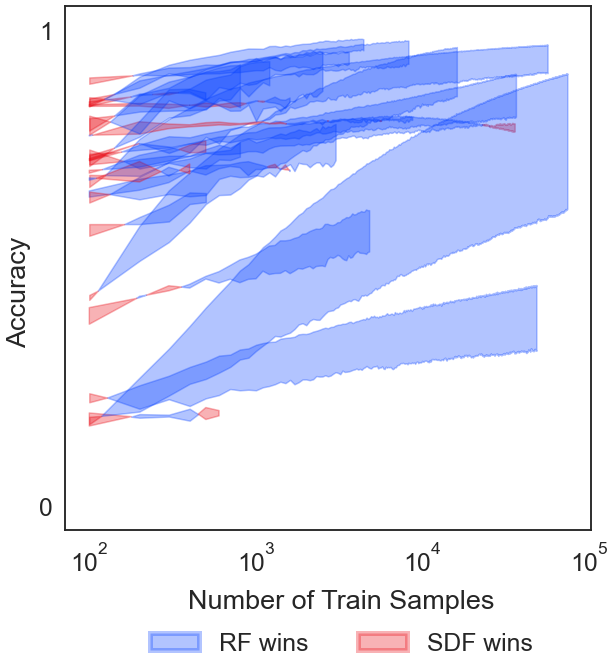

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
fig.text(-0.05, 0.5, "Accuracy", va="center", rotation="vertical")
ytitles = ["Accuracy"]
ylimits = [[-0.05, 1.05]]
yticks = [[0, 1]]

label = True
for i in range(len(datasets)):
    n_train = range(100, (ranges[i] + 1) * 100, 100)

    if not eff_filter[i]:
        # Label x axis and plot figures
        label = plot_fill(ax, avg_rf_acc_ls[i], avg_sdf_acc_ls[i], label, n_train)

# Adjust x axis
ax.set_xscale("log")

# Adjust y axis
ax.set_ylim(ylimits[0])
ax.set_yticks(yticks[0])

# Adjust overall
#     ax.set_title(datasets[count])
leg = fig.legend(
    bbox_to_anchor=(0.53, -0.17),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/cc18_fill.pdf", transparent=True, bbox_inches="tight")